In [1]:
 # IGNORE WARNINGS
import warnings
warnings.filterwarnings('ignore')

# NUMPY PACKAGES
import numpy  as np
# GENERATING RANDOM  OBJECTS

import random 
#  FOR  SYSTEM OPERATIONS

import os

# GENERATING PLOTS
import matplotlib.pyplot as plt

# IMAGE PREPRCESSING
from keras.preprocessing.image import load_img,img_to_array

# VGG16 APPLICATIONS
from keras.applications import vgg16
from keras.applications.vgg16 import preprocess_input

# MODEL OBJECT
from keras.models import Model

# IMAGE OPERATIONS
import cv2

# ONE HOT ENCODING
from keras.utils import to_categorical

# SPLITTING DATA OPERATIONS
from sklearn.model_selection import train_test_split

# TRAINING NEURAL NETWORKS
from keras import regularizers, optimizers

# FULLY CONNCETD LAYERS AND FLATTENING OUTPUT
from keras.layers import Dense,Flatten

 # GENERATING SEQUENTIAL OBJECT
from keras.models import Sequential

# CALL BACKS
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# CLASSIFICATION METRICS
from sklearn.metrics import accuracy_score


# DEEP LEARNING MODEL OBJECTS  TO SAVE
from keras.models import model_from_json

 # DEEP LEARNING  PACKAGE SOURCE API
import keras

Using TensorFlow backend.


#### CHANGING THE SYSTEM PATH WHERE ACTUAL DATA EXISTS

In [2]:
os.chdir('C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA')

In [3]:
os.getcwd()

'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA'

In [4]:
labels=[]
root_folders=[]
for root,dir,filenames in os.walk(os.getcwd()):
    for i in dir:
        if i != None and i not in ['COVID','NON_COVID']:
            labels.append(i)
    root_folders.append(root)
        

#### root_folders gives a list  of folders of images where the data exists

In [5]:
root_folders = [i for i in root_folders if  not i.split('\\')[-1] in [ 'DATA']]
root_folders

['C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA\\non_covid_Patient_0',
 'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA\\non_covid_Patient_1',
 'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA\\non_covid_Patient_10',
 'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA\\non_covid_Patient_11',
 'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA\\non_covid_Patient_12',
 'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA\\non_covid_Patient_13',
 'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA\\non_covid_Patient_14',
 'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA\\non_covid_Patient_15',
 'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA\\non_covid_Patient_16',
 'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\D

#### labels_and folders maps a tuple in which first element is a path to folder and second element is label what we are \going to assign to path

In [6]:
labels_and_folders=[(i,j) for i,j in zip(labels,root_folders)]

In [7]:
labels_and_folders

[('non_covid_Patient_0',
  'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA\\non_covid_Patient_0'),
 ('non_covid_Patient_1',
  'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA\\non_covid_Patient_1'),
 ('non_covid_Patient_10',
  'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA\\non_covid_Patient_10'),
 ('non_covid_Patient_11',
  'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA\\non_covid_Patient_11'),
 ('non_covid_Patient_12',
  'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA\\non_covid_Patient_12'),
 ('non_covid_Patient_13',
  'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA\\non_covid_Patient_13'),
 ('non_covid_Patient_14',
  'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA\\non_covid_Patient_14'),
 ('non_covid_Patient_15',
  'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CL

#### A folders(label,path) FUNCTION WHICH TAKES PATH AS INPUT AND RETURNING A LIST AS APPENDIMG THE PATH TO THE IMAGES IN A LIST¶

In [8]:
def folders(label,path):
    folder =[os.path.join(path+'\\'+ file) for file in os.listdir(path)]
    return folder

#### READ_IMAGES(DATA) ACCEPTS A LIST OF IAMGES AND TRANSFORM THEM INTO RESPECTED ARRAYS AND RETURNS AS A ARRAY OF FOLDER OF IMAGES

In [9]:
def READ_IMAGES(data):
    
    for img in range(len(data)):
        data[img] = load_img(data[img],target_size=(224,224,3),color_mode='rgb')     # REDAING IMAGES IN RGB MODE and#    RESIZING IMAGE INTO (224 X 224 x3)
        data[img] = img_to_array(data[img])
        data[img] = data[img]/255                                 #   scaling the value between 0 and 1
        data[img] = cv2.pow(data[img],0.6)                        # applying power transformation for enhancing images 
    return np.array(data)
        

#### feature_vector(model,image) takes input a image array and model as input and returns the mean of features


In [10]:
def feature_vector(model,image):
    ft_vector = model.predict(image)
    feature_vector = np.mean(ft_vector,axis=0)
    return feature_vector
        

#### LABELLING THE TARGET COLUMN ACCORDINGLY BASED ON FOLDER NAME

In [11]:
def Label(label):
        if label.startswith('non_covid_Patient'):
            return 0
        else:
            return 1


#### feature_vector2(model,image) takes input a image array and model as input and returns the median of features

In [52]:
### FOR MEDIAN OF FEATURES

def feature_vector2(model,image):
    ft_vector = model.predict(image)
    feature_vector = np.median(ft_vector,axis=0)
    return feature_vector
        

#### IMPORTING VGG19 FROM KERAS API AND SETTING VGG 16 AS NON TRAINABLE

In [13]:

vgg = vgg19.VGG19(include_top=False, weights='imagenet', 
                                     input_shape=(224,224,3))

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)

vgg_model.trainable = False
for layer in vgg_model.layers:
    layer.trainable = False

Instructions for updating:
Colocations handled automatically by placer.


#### SUMMARY OF ARCHITECTURE

In [14]:
vgg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

#### CUSTOM FUNCTION FOR PROCESSING  VGG19 ANG GETTING OUTPUT MEAN OF FEATURES

In [19]:
def vgg19_with_mean(label,path):
    folder =folders(label,path)
    img_list=READ_IMAGES(folder)
    img_list=np.array(img_list)
    img_features =feature_vector(vgg,img_list)
    target_label = Label(label)
    return img_features,target_label 

In [20]:
vgg_data=[]
for i,j in labels_and_folders:
    vgg_data.append(vgg19_with_mean(i,j))

In [21]:
target_label_vgg_mean =[j for i,j in vgg_data]
target_label_vgg_mean=to_categorical(target_label_vgg_mean)
features_mean_vgg=[i for i,j in vgg_data]


In [25]:
vgg_mean_X_train,vgg_mean_X_test,vgg_mean_Y_train,vgg_mean_Y_test = train_test_split(features_mean_vgg,target_label_vgg_mean,test_size=0.2,random_state=141397)

print("THE NO.of Images in Training Data are : {} ".format(len(vgg_mean_X_train)))
print("THE NO.of Images in VALIDATION Data are : {} ".format(len(vgg_mean_X_test)))


THE NO.of Images in Training Data are : 243 
THE NO.of Images in VALIDATION Data are : 61 


In [26]:
vgg_mean_X_train[0].shape

(7, 7, 512)

In [27]:
vgg_mean_X_train =np.array(vgg_mean_X_train)
vgg_mean_X_test =np.array(vgg_mean_X_test)

#### SIMPLE  NEURAL NETWORK

In [31]:
vgg19_model=Sequential()
vgg19_model.add(Dense(256,input_shape=(7,7,512),activation='sigmoid',kernel_initializer='glorot_uniform',
                kernel_regularizer= regularizers.l2()))


vgg19_model.add(Dense(512,activation='sigmoid', kernel_regularizer= regularizers.l2()))
vgg19_model.add(Flatten())
vgg19_model.add(Dense(2, activation='sigmoid'))



#OPtimizers
adam = keras.optimizers.Adam(lr=0.001, decay=0.0005)

## Callbacks
earlystopper = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(patience=5, verbose=1)

## Compiling the model and defining loss function
vgg19_model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

## Training neural nets
vgg_model_mean_history=vgg19_model.fit(vgg_mean_X_train,vgg_mean_Y_train,
                                              validation_data=(vgg_mean_X_test,vgg_mean_Y_test),
                                              epochs=100, batch_size=32,
                                              callbacks=[reduce_lr, earlystopper])

Train on 243 samples, validate on 61 samples
Epoch 1/100
243/243 [==============================] - 1s 4ms/step - loss: 7.9299 - acc: 0.6214 - val_loss: 7.0788 - val_acc: 0.6557
Epoch 2/100
243/243 [==============================] - 0s 2ms/step - loss: 6.1844 - acc: 0.5967 - val_loss: 5.3007 - val_acc: 0.5000
Epoch 3/100
243/243 [==============================] - 0s 2ms/step - loss: 4.8249 - acc: 0.6399 - val_loss: 4.2208 - val_acc: 0.6557
Epoch 4/100
243/243 [==============================] - 0s 2ms/step - loss: 3.9868 - acc: 0.6708 - val_loss: 3.6722 - val_acc: 0.3443
Epoch 5/100
243/243 [==============================] - 1s 2ms/step - loss: 3.1927 - acc: 0.6626 - val_loss: 2.8052 - val_acc: 0.6557
Epoch 6/100
243/243 [==============================] - 1s 2ms/step - loss: 2.6207 - acc: 0.6543 - val_loss: 2.3187 - val_acc: 0.6557
Epoch 7/100
243/243 [==============================] - 0s 2ms/step - loss: 2.2354 - acc: 0.6584 - val_loss: 1.9365 - val_acc: 0.6557
Epoch 8/100
243/243 [===

#### PLOTTING THE LOSS AND ACCURACY OF MODEL WITH MEAN OF FEATURES

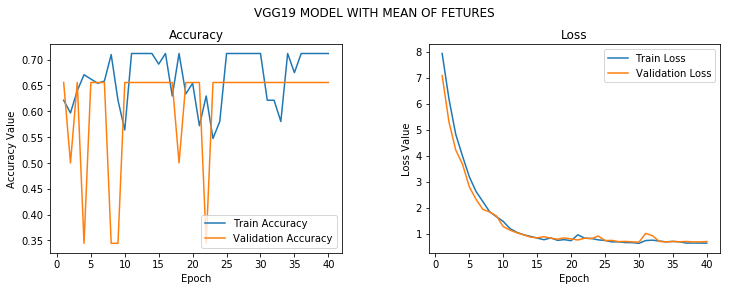

In [32]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('VGG19 MODEL WITH MEAN OF FETURES', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,41))
ax1.plot(epoch_list, vgg_model_mean_history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list,vgg_model_mean_history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 41, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, vgg_model_mean_history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, vgg_model_mean_history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 41, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

#### PREDICTIONS BASED ON MEAN OF FEATURES

In [33]:
vgg_mean_pred_train =vgg19_model.predict_classes(vgg_mean_X_train)
vgg_mean_pred_test =vgg19_model.predict_classes(vgg_mean_X_test)


#### INVERSE TRANSFORMING THE LABELS

In [34]:
vgg_labels_train = np.argmax(vgg_mean_Y_train,axis=1)
vgg_labels_test = np.argmax(vgg_mean_Y_test,axis=1)


#### METRIC SCORE FOR THE MODEL

In [35]:
print("ACCURACY SCORE OF VGG19 with MEAN OF FEATURES ON TRAINING SET IS :{}".
      format(accuracy_score(vgg_labels_train ,vgg_mean_pred_train)))
      
      
print("ACCURACY SCORE OF VGG19 with MEAN OF FEATURES ON TEST SET IS :{}".
      format(accuracy_score(vgg_labels_test,vgg_mean_pred_test)))
      
      
            

ACCURACY SCORE OF VGG19 with MEAN OF FEATURES ON TRAINING SET IS :0.7119341563786008
ACCURACY SCORE OF VGG19 with MEAN OF FEATURES ON TEST SET IS :0.6557377049180327


#### MODEL SERIALIZATION 

In [36]:
# serialize model to JSON
model_json = vgg19_model.to_json()
with open("vgg19_mean.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
vgg19_model.save_weights("vgg19_mean.h5")
print("Saved model to disk")


Saved model to disk


#### VGG 19 WITH USE OF ARBITARY LAYER PREDICTIONS  WITH MEAN OF FEATURES

In [57]:
vgg19_arb = vgg19.VGG19( weights='imagenet', 
                                     input_shape=(224,224,3))

output = vgg19_arb.get_layer('block4_pool').output
vgg19arb = Model(vgg19_arb.input, output)

vgg19arb_model.trainable = False
for layer in vgg19arb_model.layers:
    layer.trainable = False

In [17]:
vgg19arb_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [18]:
def vgg19arb_with_mean(label,path):
    folder =folders(label,path)
    img_list=READ_IMAGES(folder)
    img_list=np.array(img_list)
    img_features =feature_vector(vgg19arb_model,img_list)
    target_label = Label(label)
    return img_features,target_label 

In [19]:
vgg19arb_data=[]
for i,j in labels_and_folders:
    vgg19arb_data.append(vgg19arb_with_mean(i,j))

In [20]:
target_label_vgg19arb_mean =[j for i,j in vgg19arb_data]
target_label_vgg19arb_mean=to_categorical(target_label_vgg19arb_mean)
features_mean_vgg19_arb=[i for i,j in vgg19arb_data]


In [21]:
vgg19arb_mean_X_train,vgg19arb_mean_X_test,vgg19arb_mean_Y_train,vgg19arb_mean_Y_test = train_test_split(features_mean_vgg19_arb,target_label_vgg19arb_mean,test_size=0.2,random_state=131397)

print("THE NO.of Images in Training Data are : {} ".format(len(vgg19arb_mean_X_train)))
print("THE NO.of Images in VALIDATION Data are : {} ".format(len(vgg19arb_mean_X_test)))


THE NO.of Images in Training Data are : 243 
THE NO.of Images in VALIDATION Data are : 61 


In [22]:
vgg19arb_mean_X_train[0].shape

(14, 14, 512)

In [23]:
vgg19arb_mean_X_train =np.array(vgg19arb_mean_X_train)
vgg19arb_mean_X_test =np.array(vgg19arb_mean_X_test)

In [38]:
vgg19arb_model=Sequential()
vgg19arb_model.add(Dense(256,input_shape=(14,14,512),activation='sigmoid',kernel_initializer='glorot_uniform',
                kernel_regularizer= regularizers.l2()))


vgg19arb_model.add(Dense(512,activation='sigmoid', kernel_regularizer= regularizers.l2()))
vgg19arb_model.add(Flatten())
vgg19arb_model.add(Dense(2, activation='sigmoid'))



#OPtimizers
adam = keras.optimizers.Adam(lr=0.001, decay=0.0005)

## Callbacks
earlystopper = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(patience=5, verbose=1)

## Compiling the model and defining loss function
vgg19arb_model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

## Training neural nets
vgg19arb_model_mean_history=vgg19arb_model.fit(x=vgg19arb_mean_X_train,y=vgg19arb_mean_Y_train,
                                               validation_data=(vgg19arb_mean_X_test,vgg19arb_mean_Y_test),
                                               epochs=100, batch_size=32,
                                              callbacks=[reduce_lr, earlystopper])

Train on 243 samples, validate on 61 samples
Epoch 1/100
243/243 [==============================] - 2s 9ms/step - loss: 10.7020 - acc: 0.6379 - val_loss: 10.5550 - val_acc: 0.6885
Epoch 2/100
243/243 [==============================] - 2s 7ms/step - loss: 9.7529 - acc: 0.7037 - val_loss: 9.2443 - val_acc: 0.6885
Epoch 3/100
243/243 [==============================] - 2s 6ms/step - loss: 8.5312 - acc: 0.7037 - val_loss: 8.1583 - val_acc: 0.6885
Epoch 4/100
243/243 [==============================] - 2s 6ms/step - loss: 7.5434 - acc: 0.7037 - val_loss: 7.3057 - val_acc: 0.6885
Epoch 5/100
243/243 [==============================] - 2s 7ms/step - loss: 6.7783 - acc: 0.7037 - val_loss: 6.6572 - val_acc: 0.6885
Epoch 6/100
243/243 [==============================] - 2s 7ms/step - loss: 6.2018 - acc: 0.7037 - val_loss: 6.1748 - val_acc: 0.6885
Epoch 7/100
243/243 [==============================] - 2s 7ms/step - loss: 5.7760 - acc: 0.7037 - val_loss: 5.8222 - val_acc: 0.6885
Epoch 8/100
243/243 [=

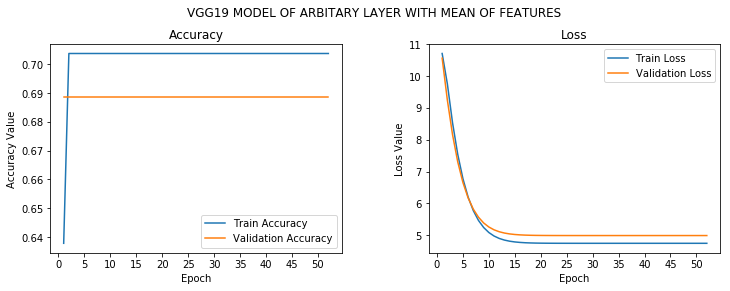

In [39]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('VGG19 MODEL OF ARBITARY LAYER WITH MEAN OF FEATURES', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,53))
ax1.plot(epoch_list, vgg19arb_model_mean_history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list,vgg19arb_model_mean_history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 53, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, vgg19arb_model_mean_history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, vgg19arb_model_mean_history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0,53, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [43]:
vgg19arb_model=Sequential()
vgg19arb_model.add(Dense(256,input_shape=(14,14,512),activation='sigmoid',kernel_initializer='glorot_uniform',
                kernel_regularizer= regularizers.l2()))


vgg19arb_model.add(Dense(512,activation='sigmoid', kernel_regularizer= regularizers.l2()))
vgg19arb_model.add(Flatten())
vgg19arb_model.add(Dense(2, activation='sigmoid'))



#OPtimizers
adam = keras.optimizers.Adam(lr=0.0001, decay=0.0005)

## Callbacks
earlystopper = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(patience=5, verbose=1)

## Compiling the model and defining loss function
vgg19arb_model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

## Training neural nets
vgg19arb_model_mean_history=vgg19arb_model.fit(x=vgg19arb_mean_X_train,y=vgg19arb_mean_Y_train,
                                               validation_data=(vgg19arb_mean_X_test,vgg19arb_mean_Y_test),
                                               epochs=100, batch_size=32,
                                              callbacks=[reduce_lr, earlystopper])

Train on 243 samples, validate on 61 samples
Epoch 1/100
243/243 [==============================] - 2s 9ms/step - loss: 7.6924 - acc: 0.5617 - val_loss: 7.6976 - val_acc: 0.6885
Epoch 2/100
243/243 [==============================] - 2s 6ms/step - loss: 7.5312 - acc: 0.5926 - val_loss: 7.2283 - val_acc: 0.6885
Epoch 3/100
243/243 [==============================] - 2s 6ms/step - loss: 7.2540 - acc: 0.6687 - val_loss: 7.1497 - val_acc: 0.5328
Epoch 4/100
243/243 [==============================] - 2s 7ms/step - loss: 7.0174 - acc: 0.6955 - val_loss: 6.9361 - val_acc: 0.6885
Epoch 5/100
243/243 [==============================] - 2s 7ms/step - loss: 6.8782 - acc: 0.7078 - val_loss: 6.9127 - val_acc: 0.6885
Epoch 6/100
243/243 [==============================] - 2s 7ms/step - loss: 6.8004 - acc: 0.6440 - val_loss: 6.7893 - val_acc: 0.6885
Epoch 7/100
243/243 [==============================] - 2s 7ms/step - loss: 6.6997 - acc: 0.6502 - val_loss: 6.6576 - val_acc: 0.5410
Epoch 8/100
243/243 [===

Epoch 62/100
243/243 [==============================] - 2s 8ms/step - loss: 2.4354 - acc: 0.7901 - val_loss: 2.3983 - val_acc: 0.7541
Epoch 63/100
243/243 [==============================] - 2s 7ms/step - loss: 2.3901 - acc: 0.8128 - val_loss: 2.3705 - val_acc: 0.9180
Epoch 64/100
243/243 [==============================] - 2s 7ms/step - loss: 2.3618 - acc: 0.8086 - val_loss: 2.3913 - val_acc: 0.6885
Epoch 65/100
243/243 [==============================] - 2s 6ms/step - loss: 2.3424 - acc: 0.8004 - val_loss: 2.3311 - val_acc: 0.7049
Epoch 66/100
243/243 [==============================] - 2s 7ms/step - loss: 2.3385 - acc: 0.7551 - val_loss: 2.3489 - val_acc: 0.6885
Epoch 67/100
243/243 [==============================] - 2s 7ms/step - loss: 2.2603 - acc: 0.8189 - val_loss: 2.2190 - val_acc: 0.8361
Epoch 68/100
243/243 [==============================] - 2s 7ms/step - loss: 2.2119 - acc: 0.8354 - val_loss: 2.2656 - val_acc: 0.6885
Epoch 69/100
243/243 [==============================] - 2s 7ms

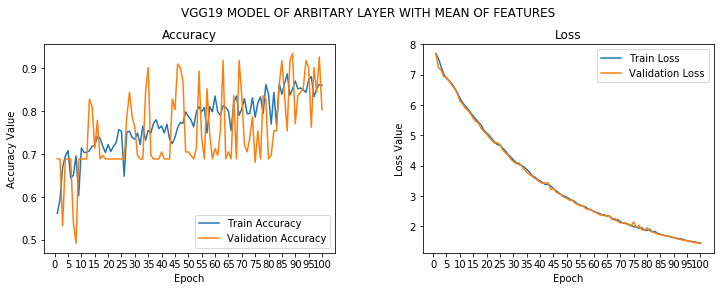

In [45]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('VGG19 MODEL OF ARBITARY LAYER WITH MEAN OF FEATURES', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(epoch_list, vgg19arb_model_mean_history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list,vgg19arb_model_mean_history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, vgg19arb_model_mean_history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, vgg19arb_model_mean_history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0,101, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [46]:
vgg19arb_mean_pred_train =vgg19arb_model.predict_classes(vgg19arb_mean_X_train)
vgg19arb_mean_pred_test =vgg19arb_model.predict_classes(vgg19arb_mean_X_test)


In [47]:
vgg19arb_mean_labels_train = np.argmax(vgg19arb_mean_Y_train,axis=1)
vgg19arb_mean_labels_test = np.argmax(vgg19arb_mean_Y_test,axis=1)


In [48]:
print("ACCURACY SCORE OF VGG19 with MEAN OF FEATURES ON TRAINING SET IS :{}".
      format(accuracy_score(vgg19arb_mean_labels_train ,vgg19arb_mean_pred_train)))
      
      
print("ACCURACY SCORE OF VGG19 with MEAN OF FEATURES ON TEST SET IS :{}".
      format(accuracy_score(vgg19arb_mean_labels_test,vgg19arb_mean_pred_test)))
      
      
            

ACCURACY SCORE OF VGG19 with MEAN OF FEATURES ON TRAINING SET IS :0.823045267489712
ACCURACY SCORE OF VGG19 with MEAN OF FEATURES ON TEST SET IS :0.8032786885245902


#### MODEL SERIALIZATION

In [49]:
# serialize model to JSON
model_json = vgg19arb_model.to_json()
with open("vgg19arb_mean.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
vgg19arb_model.save_weights("vgg19arb_mean.h5")
print("Saved model to disk")


Saved model to disk


#### ADDITION OF ANOTHER HIDDEN LAYER  WITH ARBITARY LAYER PREDICTION

In [87]:
vgg19arb_model1=Sequential()
vgg19arb_model1.add(Dense(256,input_shape=(14,14,512),activation='sigmoid',kernel_initializer='glorot_uniform',
                kernel_regularizer= regularizers.l2()))


vgg19arb_model1.add(Dense(512,activation='sigmoid', kernel_regularizer= regularizers.l2()))
vgg19arb_model1.add(Flatten())
vgg19arb_model1.add(Dense(2, activation='sigmoid'))



#OPtimizers
adam = keras.optimizers.Adam(lr=0.0001, decay=0.0005)

## Callbacks
earlystopper = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(patience=5, verbose=1)

## Compiling the model and defining loss function
vgg19arb_model1.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

## Training neural nets
vgg19arb_model_mean_history1=vgg19arb_model1.fit(x=vgg19arb_mean_X_train,y=vgg19arb_mean_Y_train,
                                               validation_data=(vgg19arb_mean_X_test,vgg19arb_mean_Y_test),
                                               epochs=100, batch_size=32,
                                              callbacks=[reduce_lr, earlystopper])

Train on 243 samples, validate on 61 samples
Epoch 1/100
243/243 [==============================] - 6s 23ms/step - loss: 7.6437 - acc: 0.5802 - val_loss: 7.5629 - val_acc: 0.6885
Epoch 2/100
243/243 [==============================] - 2s 7ms/step - loss: 7.3651 - acc: 0.6399 - val_loss: 7.3298 - val_acc: 0.6885
Epoch 3/100
243/243 [==============================] - 2s 7ms/step - loss: 7.1725 - acc: 0.6049 - val_loss: 7.1744 - val_acc: 0.6885
Epoch 4/100
243/243 [==============================] - 2s 7ms/step - loss: 7.0652 - acc: 0.6091 - val_loss: 6.8847 - val_acc: 0.6885
Epoch 5/100
243/243 [==============================] - 2s 7ms/step - loss: 6.8232 - acc: 0.7037 - val_loss: 6.7882 - val_acc: 0.6885
Epoch 6/100
243/243 [==============================] - 2s 7ms/step - loss: 6.6996 - acc: 0.7037 - val_loss: 6.5840 - val_acc: 0.6885
Epoch 7/100
243/243 [==============================] - 2s 7ms/step - loss: 6.5358 - acc: 0.7181 - val_loss: 6.5753 - val_acc: 0.6885
Epoch 8/100
243/243 [==

Epoch 62/100
243/243 [==============================] - 2s 7ms/step - loss: 2.3147 - acc: 0.7737 - val_loss: 2.2829 - val_acc: 0.6967
Epoch 63/100
243/243 [==============================] - 2s 7ms/step - loss: 2.2868 - acc: 0.7840 - val_loss: 2.3120 - val_acc: 0.6885
Epoch 64/100
243/243 [==============================] - 2s 6ms/step - loss: 2.2689 - acc: 0.7798 - val_loss: 2.2187 - val_acc: 0.7049
Epoch 65/100
243/243 [==============================] - 2s 7ms/step - loss: 2.2219 - acc: 0.7840 - val_loss: 2.1772 - val_acc: 0.6885
Epoch 66/100
243/243 [==============================] - 2s 7ms/step - loss: 2.1776 - acc: 0.7798 - val_loss: 2.1273 - val_acc: 0.8361
Epoch 67/100
243/243 [==============================] - 2s 7ms/step - loss: 2.1313 - acc: 0.8045 - val_loss: 2.1108 - val_acc: 0.7049
Epoch 68/100
243/243 [==============================] - 2s 7ms/step - loss: 2.0981 - acc: 0.7901 - val_loss: 2.0623 - val_acc: 0.8361
Epoch 69/100
243/243 [==============================] - 2s 7ms

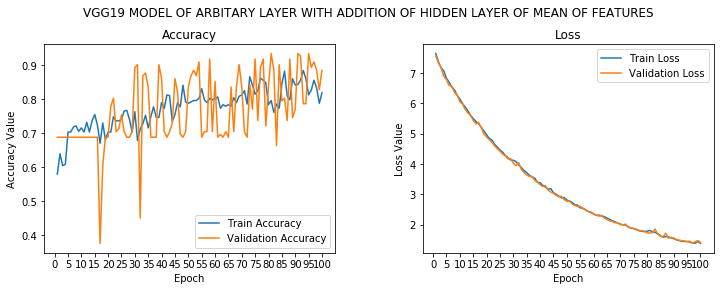

In [90]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('VGG19 MODEL OF ARBITARY LAYER WITH ADDITION OF HIDDEN LAYER OF MEAN OF FEATURES', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(epoch_list, vgg19arb_model_mean_history1.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list,vgg19arb_model_mean_history1.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, vgg19arb_model_mean_history1.history['loss'], label='Train Loss')
ax2.plot(epoch_list, vgg19arb_model_mean_history1.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0,101, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [89]:
# serialize model to JSON
model_json = vgg19arb_model1.to_json()
with open("vgg19arb_mean1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
vgg19arb_model1.save_weights("vgg19arb_mean1.h5")
print("Saved model to disk")


Saved model to disk


#### VGG19 with MEDIAN OF FEATURES

In [37]:
def vgg19_with_median(label,path):
    folder =folders(label,path)
    img_list=READ_IMAGES(folder)
    img_list=np.array(img_list)
    img_features =feature_vector2(vgg,img_list)
    target_label = Label(label)
    return img_features,target_label 

In [38]:
vgg_data2=[]
for i,j in labels_and_folders:
    vgg_data2.append(vgg19_with_median(i,j))

In [39]:
target_label_vgg_median =[j for i,j in vgg_data2]
target_label_vgg_median=to_categorical(target_label_vgg_median)
features_median_vgg=[i for i,j in vgg_data2]


In [41]:
vgg_median_X_train,vgg_median_X_test,vgg_median_Y_train,vgg_median_Y_test = train_test_split(features_median_vgg,target_label_vgg_median,test_size=0.2,random_state=141097)

print("THE NO.of Images in Training Data are : {} ".format(len(vgg_median_X_train)))
print("THE NO.of Images in VALIDATION Data are : {} ".format(len(vgg_median_X_test)))


THE NO.of Images in Training Data are : 243 
THE NO.of Images in VALIDATION Data are : 61 


In [42]:
vgg_median_X_train =np.array(vgg_median_X_train)
vgg_median_X_test =np.array(vgg_median_X_test)

In [45]:
vgg19_model_median=Sequential()
vgg19_model_median.add(Dense(256,input_shape=(7,7,512),activation='sigmoid',kernel_initializer='glorot_uniform',
                kernel_regularizer= regularizers.l2()))

vgg19_model_median.add(Dense(512,activation='sigmoid', kernel_regularizer= regularizers.l2()))
vgg19_model_median.add(Flatten())
vgg19_model_median.add(Dense(2, activation='sigmoid'))



#OPtimizers
adam = keras.optimizers.Adam(lr=0.001, decay=0.0005)

## Callbacks
earlystopper = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(patience=5, verbose=1)

## Compiling the model and defining loss function
vgg19_model_median.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

## Training neural nets
vgg_model_median_history=vgg19_model_median.fit(vgg_median_X_train,vgg_median_Y_train,
                                              validation_data=(vgg_median_X_test,vgg_median_Y_test),
                                              epochs=100, batch_size=32,
                                              callbacks=[reduce_lr, earlystopper])

Train on 243 samples, validate on 61 samples
Epoch 1/100
243/243 [==============================] - 2s 6ms/step - loss: 8.5485 - acc: 0.5638 - val_loss: 6.8649 - val_acc: 0.7377
Epoch 2/100
243/243 [==============================] - 0s 2ms/step - loss: 6.4094 - acc: 0.5185 - val_loss: 5.6454 - val_acc: 0.7377
Epoch 3/100
243/243 [==============================] - 0s 2ms/step - loss: 5.0780 - acc: 0.6358 - val_loss: 4.3424 - val_acc: 0.7377
Epoch 4/100
243/243 [==============================] - 1s 2ms/step - loss: 4.1401 - acc: 0.6481 - val_loss: 3.6843 - val_acc: 0.5000
Epoch 5/100
243/243 [==============================] - 1s 2ms/step - loss: 3.3586 - acc: 0.6255 - val_loss: 2.9234 - val_acc: 0.7377
Epoch 6/100
243/243 [==============================] - 1s 2ms/step - loss: 2.7561 - acc: 0.6502 - val_loss: 2.4236 - val_acc: 0.7377
Epoch 7/100
243/243 [==============================] - 1s 2ms/step - loss: 2.3015 - acc: 0.6914 - val_loss: 2.0462 - val_acc: 0.5000
Epoch 8/100
243/243 [===

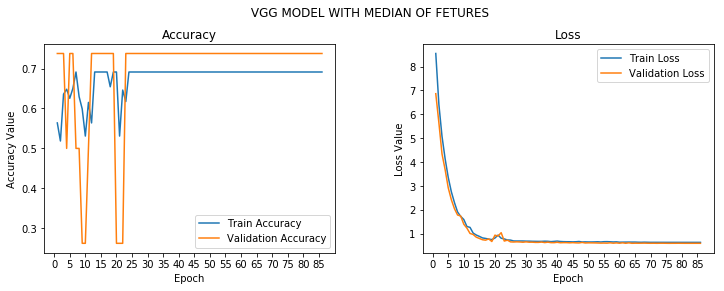

In [47]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle(' VGG MODEL WITH MEDIAN OF FETURES', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,87))
ax1.plot(epoch_list, vgg_model_median_history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list,vgg_model_median_history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 87, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, vgg_model_median_history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, vgg_model_median_history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0,87, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [48]:
vgg_median_pred_train =vgg19_model_median.predict_classes(vgg_median_X_train)
vgg_median_pred_test =vgg19_model_median.predict_classes(vgg_median_X_test)


In [49]:
vgg_labels_train = np.argmax(vgg_median_Y_train,axis=1)
vgg_labels_test = np.argmax(vgg_median_Y_test,axis=1)


In [50]:
print("ACCURACY SCORE OF VGG19 with MEDIAN OF FEATURES ON TRAINING SET IS :{}".
      format(accuracy_score(vgg_labels_train ,vgg_median_pred_train)))
      
      
print("ACCURACY SCORE OF VGG19 with MEDIAN OF FEATURES ON TEST SET IS :{}".
      format(accuracy_score(vgg_labels_test,vgg_median_pred_test)))
      

ACCURACY SCORE OF VGG19 with MEDIAN OF FEATURES ON TRAINING SET IS :0.691358024691358
ACCURACY SCORE OF VGG19 with MEDIAN OF FEATURES ON TEST SET IS :0.7377049180327869


#### MODEL SERIALIZATION

In [52]:
# serialize model to JSON
model_json = vgg19_model_median.to_json()
with open("vgg19_model_median.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
vgg19_model_median.save_weights("vgg19_model_median.h5")
print("Saved model to disk")


Saved model to disk


#### VGG19 WITH ARBITRAY LAYER PREDICTION AND MEDIAN OF FEATURES

In [62]:
def vgg19arb_with_median(label,path):
    folder =folders(label,path)
    img_list=READ_IMAGES(folder)
    img_list=np.array(img_list)
    img_features =feature_vector2(vgg19arb,img_list)
    target_label = Label(label)
    return img_features,target_label 

In [63]:
vgg19arb_data2=[]
for i,j in labels_and_folders:
    vgg19arb_data2.append(vgg19arb_with_median(i,j))

In [64]:
target_label_vgg19arb_median =[j for i,j in vgg19arb_data2]
target_label_vgg19arb_median=to_categorical(target_label_vgg19arb_median)
features_median_vgg19arb=[i for i,j in vgg19arb_data2]


In [72]:
vgg19arb_median_X_train,vgg19arb_median_X_test,vgg19arb_median_Y_train,vgg19arb_median_Y_test = train_test_split(features_median_vgg19arb,target_label_vgg19arb_median,test_size=0.2,random_state=1210976)

print("THE NO.of Images in Training Data are : {} ".format(len(vgg19arb_median_X_train)))
print("THE NO.of Images in VALIDATION Data are : {} ".format(len(vgg19arb_median_X_test)))


THE NO.of Images in Training Data are : 243 
THE NO.of Images in VALIDATION Data are : 61 


In [73]:
vgg19arb_median_X_train =np.array(vgg19arb_median_X_train)
vgg19arb_median_X_test =np.array(vgg19arb_median_X_test)

In [74]:
vgg19arb_model_median=Sequential()
vgg19arb_model_median.add(Dense(256,input_shape=(14,14,512),activation='sigmoid',kernel_initializer='glorot_uniform',
                kernel_regularizer= regularizers.l2()))

vgg19arb_model_median.add(Dense(512,activation='sigmoid', kernel_regularizer= regularizers.l2()))
vgg19arb_model_median.add(Flatten())
vgg19arb_model_median.add(Dense(2, activation='sigmoid'))



#OPtimizers
adam = keras.optimizers.Adam(lr=0.0001, decay=0.0005)

## Callbacks
earlystopper = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(patience=5, verbose=1)

## Compiling the model and defining loss function
vgg19arb_model_median.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

## Training neural nets
vgg19arb_model_median_history=vgg19arb_model_median.fit(vgg19arb_median_X_train,vgg19arb_median_Y_train,
                                              validation_data=(vgg19arb_median_X_test,vgg19arb_median_Y_test),
                                              epochs=100, batch_size=32,
                                              callbacks=[reduce_lr, earlystopper])

Train on 243 samples, validate on 61 samples
Epoch 1/100
243/243 [==============================] - 3s 11ms/step - loss: 7.6257 - acc: 0.5638 - val_loss: 7.6277 - val_acc: 0.6557
Epoch 2/100
243/243 [==============================] - 2s 7ms/step - loss: 7.3157 - acc: 0.7099 - val_loss: 7.2278 - val_acc: 0.6557
Epoch 3/100
243/243 [==============================] - 2s 7ms/step - loss: 7.1123 - acc: 0.7099 - val_loss: 7.0911 - val_acc: 0.6557
Epoch 4/100
243/243 [==============================] - 2s 7ms/step - loss: 6.9504 - acc: 0.7119 - val_loss: 6.9168 - val_acc: 0.6885
Epoch 5/100
243/243 [==============================] - 2s 7ms/step - loss: 6.8243 - acc: 0.7243 - val_loss: 6.7897 - val_acc: 0.6967
Epoch 6/100
243/243 [==============================] - 2s 7ms/step - loss: 6.6860 - acc: 0.7140 - val_loss: 6.6418 - val_acc: 0.7213
Epoch 7/100
243/243 [==============================] - 2s 7ms/step - loss: 6.5536 - acc: 0.7387 - val_loss: 6.4725 - val_acc: 0.6967
Epoch 8/100
243/243 [==

Epoch 62/100
243/243 [==============================] - 2s 7ms/step - loss: 2.2192 - acc: 0.8580 - val_loss: 2.3491 - val_acc: 0.6721
Epoch 63/100
243/243 [==============================] - 2s 7ms/step - loss: 2.1697 - acc: 0.8354 - val_loss: 2.2364 - val_acc: 0.7623
Epoch 64/100
243/243 [==============================] - 2s 7ms/step - loss: 2.1151 - acc: 0.8642 - val_loss: 2.1987 - val_acc: 0.7705
Epoch 65/100
243/243 [==============================] - 2s 7ms/step - loss: 2.0868 - acc: 0.8642 - val_loss: 2.1938 - val_acc: 0.7131
Epoch 66/100
243/243 [==============================] - 2s 7ms/step - loss: 2.0500 - acc: 0.8580 - val_loss: 2.1277 - val_acc: 0.7705
Epoch 67/100
243/243 [==============================] - 2s 6ms/step - loss: 2.0178 - acc: 0.8683 - val_loss: 2.1517 - val_acc: 0.6803
Epoch 68/100
243/243 [==============================] - 2s 7ms/step - loss: 2.0069 - acc: 0.8128 - val_loss: 2.1994 - val_acc: 0.6557
Epoch 69/100
243/243 [==============================] - 2s 6ms

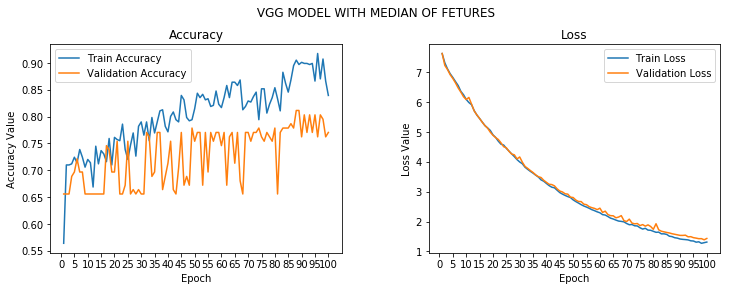

In [76]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle(' VGG MODEL WITH MEDIAN OF FETURES', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(epoch_list, vgg19arb_model_median_history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list,vgg19arb_model_median_history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0,101, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, vgg19arb_model_median_history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, vgg19arb_model_median_history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0,101, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [80]:
vggarb_median_pred_train =vgg19arb_model_median.predict_classes(vgg19arb_median_X_train)
vggarb_median_pred_test =vgg19arb_model_median.predict_classes(vgg19arb_median_X_test)


In [81]:
vggarb_labels_train = np.argmax(vgg19arb_median_Y_train,axis=1)
vggarb_labels_test = np.argmax(vgg19arb_median_Y_test,axis=1)


In [82]:
print("ACCURACY SCORE OF VGG19 with MEDIAN OF FEATURES ON TRAINING SET IS :{}".
      format(accuracy_score(vggarb_labels_train ,vggarb_median_pred_train)))
      
      
print("ACCURACY SCORE OF VGG19 with MEDIAN OF FEATURES ON TEST SET IS :{}".
      format(accuracy_score(vggarb_labels_test,vggarb_median_pred_test)))
      

ACCURACY SCORE OF VGG19 with MEDIAN OF FEATURES ON TRAINING SET IS :0.7901234567901234
ACCURACY SCORE OF VGG19 with MEDIAN OF FEATURES ON TEST SET IS :0.7704918032786885


In [83]:
# serialize model to JSON
model_json = vgg19arb_model_median.to_json()
with open("vgg19arb_model_median.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
vgg19arb_model_median.save_weights("vgg19arb_model_median.h5")
print("Saved model to disk")


Saved model to disk


#### ADDING ONE  MORE HIDDEN LAYER 

In [84]:
vgg19arb_model_median1=Sequential()
vgg19arb_model_median1.add(Dense(128,input_shape=(14,14,512),activation='sigmoid',kernel_initializer='glorot_uniform',
                kernel_regularizer= regularizers.l2()))

vgg19arb_model_median1.add(Dense(256,activation='sigmoid', kernel_regularizer= regularizers.l2()))
vgg19arb_model_median1.add(Dense(512,activation='sigmoid', kernel_regularizer= regularizers.l2()))

vgg19arb_model_median1.add(Flatten())
vgg19arb_model_median1.add(Dense(2, activation='sigmoid'))



#OPtimizers
adam = keras.optimizers.Adam(lr=0.0001, decay=0.0005)

## Callbacks
earlystopper = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(patience=5, verbose=1)

## Compiling the model and defining loss function
vgg19arb_model_median1.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

## Training neural nets
vgg19arb_model_median_history1=vgg19arb_model_median1.fit(vgg19arb_median_X_train,vgg19arb_median_Y_train,
                                              validation_data=(vgg19arb_median_X_test,vgg19arb_median_Y_test),
                                              epochs=100, batch_size=32,
                                              callbacks=[reduce_lr, earlystopper])

Train on 243 samples, validate on 61 samples
Epoch 1/100
243/243 [==============================] - 3s 12ms/step - loss: 8.2311 - acc: 0.5391 - val_loss: 7.8024 - val_acc: 0.5000
Epoch 2/100
243/243 [==============================] - 2s 7ms/step - loss: 7.9006 - acc: 0.6749 - val_loss: 7.6611 - val_acc: 0.5000
Epoch 3/100
243/243 [==============================] - 2s 7ms/step - loss: 7.6166 - acc: 0.5658 - val_loss: 7.4714 - val_acc: 0.6557
Epoch 4/100
243/243 [==============================] - 2s 7ms/step - loss: 7.3062 - acc: 0.7119 - val_loss: 7.2689 - val_acc: 0.6557
Epoch 5/100
243/243 [==============================] - 2s 7ms/step - loss: 7.1913 - acc: 0.7119 - val_loss: 7.2054 - val_acc: 0.6557
Epoch 6/100
243/243 [==============================] - 2s 7ms/step - loss: 7.0432 - acc: 0.7119 - val_loss: 6.9979 - val_acc: 0.6557
Epoch 7/100
243/243 [==============================] - 2s 7ms/step - loss: 6.9082 - acc: 0.7119 - val_loss: 6.8740 - val_acc: 0.6557
Epoch 8/100
243/243 [==

Epoch 62/100
243/243 [==============================] - 2s 7ms/step - loss: 2.6403 - acc: 0.7119 - val_loss: 2.6482 - val_acc: 0.6557
Epoch 63/100
243/243 [==============================] - 2s 7ms/step - loss: 2.6036 - acc: 0.7119 - val_loss: 2.6223 - val_acc: 0.6557
Epoch 64/100
243/243 [==============================] - 2s 7ms/step - loss: 2.5656 - acc: 0.7119 - val_loss: 2.5967 - val_acc: 0.6557
Epoch 65/100
243/243 [==============================] - 2s 7ms/step - loss: 2.5204 - acc: 0.7119 - val_loss: 2.6436 - val_acc: 0.6557
Epoch 66/100
243/243 [==============================] - 2s 7ms/step - loss: 2.5274 - acc: 0.6173 - val_loss: 2.4956 - val_acc: 0.6557
Epoch 67/100
243/243 [==============================] - 2s 7ms/step - loss: 2.4431 - acc: 0.7119 - val_loss: 2.4574 - val_acc: 0.6557
Epoch 68/100
243/243 [==============================] - 2s 7ms/step - loss: 2.4783 - acc: 0.7119 - val_loss: 2.4270 - val_acc: 0.6557
Epoch 69/100
243/243 [==============================] - 2s 7ms

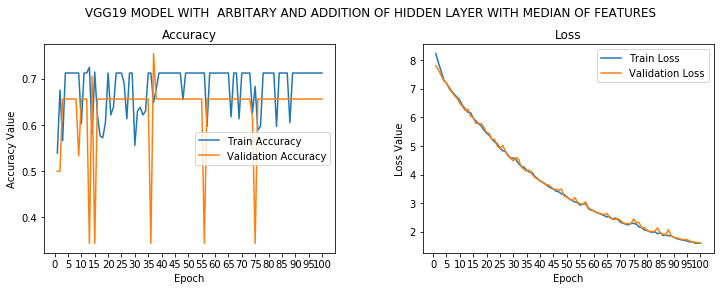

In [85]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle(' VGG19 MODEL WITH  ARBITARY AND ADDITION OF HIDDEN LAYER WITH MEDIAN OF FEATURES', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(epoch_list, vgg19arb_model_median_history1.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list,vgg19arb_model_median_history1.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0,101, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, vgg19arb_model_median_history1.history['loss'], label='Train Loss')
ax2.plot(epoch_list, vgg19arb_model_median_history1.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0,101, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

#### MODEL SERIALIZATION

In [86]:
#serialize model to JSON
model_json = vgg19arb_model_median1.to_json()
with open("vgg19arb_model_median1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
vgg19arb_model_median1.save_weights("vgg19arb_model_median1.h5")
print("Saved model to disk")


Saved model to disk
